In [13]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('instagram.csv')
df = df.head(50000)
df.head()

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3,2023-07-11 23:57:07
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09
2,Instagram is the best of all the social media....,5,2023-07-25 03:24:58
3,"I love this app.. but as of late, I have been ...",2,2023-07-09 04:49:57
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04


In [4]:
rows, cols = df.shape
print(f"There are {rows} and {cols} columns in dataset")

There are 50000 and 3 columns in dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  50000 non-null  object
 1   rating              50000 non-null  int64 
 2   review_date         50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,rating
count,50000.000000
mean,2.234680
std,1.474845
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


In [7]:
print(f"There are {df.duplicated().sum()} duplicate values")
df = df.drop_duplicates()

There are 0 duplicate values


In [8]:
df['review_description'][0]

"The app is good for connecting with friends, family and even potential business partners. However as of recently I've experienced some problems with the messages portion of the app (ex: themes aren't showing up on my end but are present on other person's end). Idk if it has to do with a bug but it happened all of sudden out of nowhere on both of my pages (one private the other public). But besides the occasional bugs and sometimes the app/website being down randomly, I say it's a decent app."

In [9]:
for i in range(len(df['review_description'])):
     df['review_description'][i]= re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",df['review_description'][i])

In [10]:
df.isna().sum()

review_description    0
rating                0
review_date           0
dtype: int64

In [14]:
analyzer = SentimentIntensityAnalyzer()
df['review_description'] = df['review_description'].astype(str)
df['polarity_score'] = df['review_description'].apply(lambda review: analyzer.polarity_scores(review)['compound'])

In [15]:
df

,review_description,rating,review_date,polarity_score
0,The app is good for connecting with friends fa...,3,2023-07-11 23:57:07,0.1406
1,Used to be my favorite social media app but im...,2,2023-07-22 21:37:09,-0.6352
2,Instagram is the best of all the social media ...,5,2023-07-25 03:24:58,0.9584
3,I love this app but as of late I have been hav...,2,2023-07-09 04:49:57,-0.4201
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04,-0.1276
...,...,...,...,...
49995,App is getting crash every time I watch insta ...,1,2023-06-22 07:04:01,-0.4019
49996,The lastest update wont let me see ANY picture...,1,2019-10-25 03:05:16,0.3974
49997,Really like instagram But recently the app has...,1,2019-11-14 05:39:21,0.7984
49998,I dont know why but a few days ago it just com...,3,2022-06-29 18:06:12,-0.6885


In [19]:
for index, row in df.iterrows():
    if(row['polarity_score']>=0.5):
        df.loc[index, 'analysis'] = "Positive"
    elif(row['polarity_score']<=0.5):
        df.loc[index, 'analysis'] = "Negative"
    else:
        df.loc[index, 'analysis'] = "Neutral"
 

In [20]:
df

,review_description,rating,review_date,polarity_score,analysis
0,The app is good for connecting with friends fa...,3,2023-07-11 23:57:07,0.1406,Negative
1,Used to be my favorite social media app but im...,2,2023-07-22 21:37:09,-0.6352,Negative
2,Instagram is the best of all the social media ...,5,2023-07-25 03:24:58,0.9584,Positive
3,I love this app but as of late I have been hav...,2,2023-07-09 04:49:57,-0.4201,Negative
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04,-0.1276,Negative
...,...,...,...,...,...
49995,App is getting crash every time I watch insta ...,1,2023-06-22 07:04:01,-0.4019,Negative
49996,The lastest update wont let me see ANY picture...,1,2019-10-25 03:05:16,0.3974,Negative
49997,Really like instagram But recently the app has...,1,2019-11-14 05:39:21,0.7984,Positive
49998,I dont know why but a few days ago it just com...,3,2022-06-29 18:06:12,-0.6885,Negative


<BarContainer object of 50000 artists>

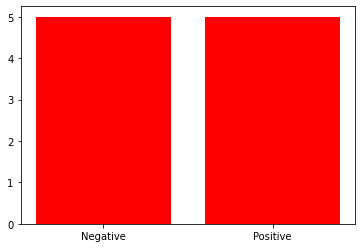

In [21]:
# Plotting a barplot to check relation between analysis and rating.
plt.bar(df['analysis'],df['rating'],color ='r')

In [22]:
def rating(x):
    if x>=8 and x<=10:
        return 'Positive'
    elif x>=4 and x<=7:
         return 'Neutral'
    else:
         return 'Negative'

In [23]:
df['rating_analysis']=df['rating'].apply(rating)

In [24]:
df['final_rating'] = 'Positive'

In [25]:
for i in range(len(df)):
    if (df['analysis'][i]=='Positive' and df['rating_analysis'][i] == 'Positive'):
        df['final_rating'][i] = 'Positive'
        
    elif (df['analysis'][i] == 'Positive' and df['rating_analysis'][i] == 'Neutral')or (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Positive'):
        df['final_rating'][i] = 'Positive'
        
    elif (df['analysis'][i] == 'Negative' and df['rating_analysis'][i] == 'Neutral')or (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Negative'):
        df['final_rating'][i] = 'Neutral'
        
    elif (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Neutral'):
        df['final_rating'][i] = 'Neutral'
   
    elif (df['analysis'][i] == 'Negative' and df['rating_analysis'][i] == 'Negative'):
        df['final_rating'][i] = 'Negative'
        
    else:
        df['final_rating'][i] = 'Neutral'

In [ ]:
sns.countplot(x='final_rating',data =df)